# Data Visualization in Data Science

Data visualization helps us 
- understand data
- identify patterns
- communicate insights effectively. 

Goal
- Understand the importance of data visualization in data analysis.
- Learn about different types of data visualizations and when to use them.
- Gain hands-on experience with popular Python libraries for data visualization.

## 1. Import Data Visualization Libraries

Let's start by importing the essential libraries for data visualization in Python. We'll use matplotlib and seaborn, which are widely used for creating a variety of plots.

In [114]:
# Import essential libraries for data visualization
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

## Real data example

We start by looking at some historical CO2 data. In the next cell, we download the 2 datasets used here for CO2 study: 
- ancient CO2 data from ice cores 
- recent Mauna Loa CO2 data.

In [115]:
# Download and load ancient CO2 data (800,000 years ago to 1958)
# !wget https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-co2-2008.txt

# Download and load recent Mauna Loa CO2 data (1958 to today)
# !wget https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv

In [116]:
# Reading in data
txtFilename = 'bin/edc-co2-2008.txt'
ancientData = pd.read_csv(txtFilename, delimiter=r'\s+', skiprows=773, header=None)
headersRaw = pd.read_csv(txtFilename, delimiter=r'\s+', skiprows=773, nrows=1, header=None)
headers = headersRaw.sum(axis=0)
ancientData = pd.read_csv(txtFilename, delimiter=r'\s+', skiprows=774, names=list(headers))
print("The number of (measurements, attributes) in these data is:", ancientData.shape)

The number of (measurements, attributes) in these data is: (1096, 2)


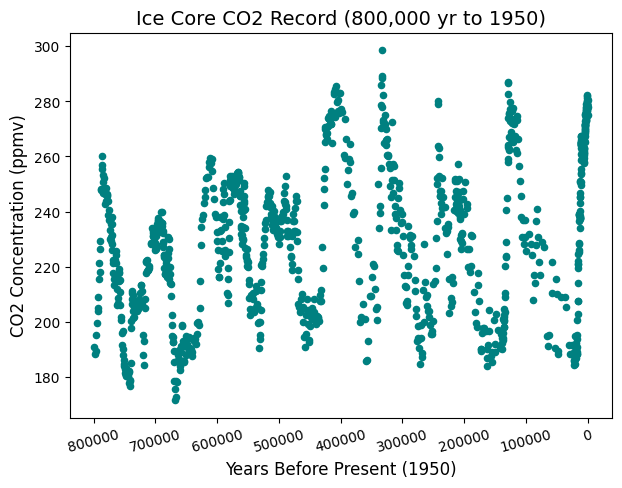

In [117]:
# Quick plot of ancient CO2 data (reversing x-axis for time)
fig, ax = plt.subplots(figsize=(7, 5))
ancientData.plot.scatter(x='Age(yrBP)', y='CO2(ppmv)', color='teal', ax=ax)
# ax.set_title("Ice Core CO2 Record (800,000 yr to 1950)")
ax.set_title("Ice Core CO2 Record (800,000 yr to 1950)", fontsize=14)
ax.invert_xaxis()
ax.set_xlabel('Years Before Present (1950)', fontsize=12)
plt.ylabel('CO2 Concentration (ppmv)', fontsize=12)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10);

In [118]:
csvFilename = 'bin/monthly_in_situ_co2_mlo.csv'
headersRaw = pd.read_csv(csvFilename, skiprows=61, nrows=3, header=None)
headersRaw = headersRaw.fillna('')  # Fill NaN values with empty strings
headers = headersRaw.sum(axis=0)
headersClean = [h.replace(' ', '') for h in list(headers)]
recentData = pd.read_csv(csvFilename, skiprows=64, names=headersClean)
print("The number of (measurements, attributes) in these data is:", recentData.shape)

The number of (measurements, attributes) in these data is: (816, 11)


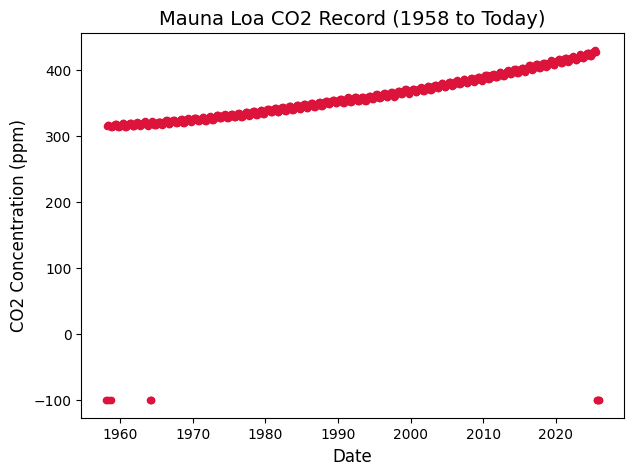

In [119]:
# Quick plot of recent Mauna Loa CO2 data
fig, ax = plt.subplots(figsize=(7,5))
ax = recentData.plot.scatter(x='Date', y='CO2[ppm]', color='crimson', ax=ax)
ax.set_title("Mauna Loa CO2 Record (1958 to Today)", fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CO2 Concentration (ppm)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

In [120]:
recentData.head()

,Yr,Mn,DateExcel,Date,CO2[ppm],seasonallyadjusted[ppm],fit[ppm],seasonallyadjustedfit[ppm],CO2filled[ppm],seasonallyadjustedfilled[ppm],Sta
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
2,1958,3,21259,1958.2027,315.71,314.43,316.20,314.91,315.71,314.43,MLO
3,1958,4,21290,1958.2877,317.45,315.15,317.31,314.99,317.45,315.15,MLO
4,1958,5,21320,1958.3699,317.51,314.68,317.89,315.07,317.51,314.68,MLO


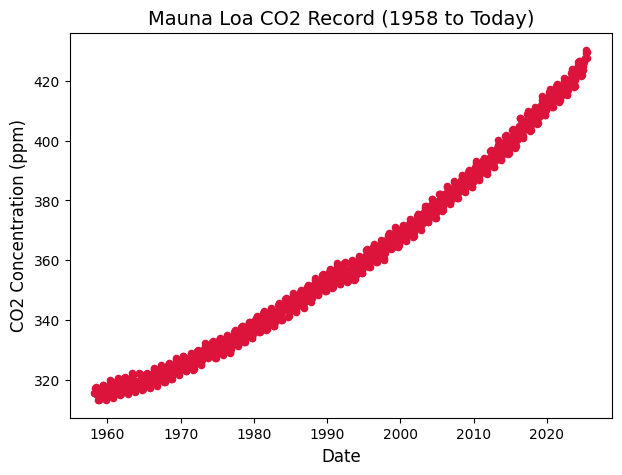

In [121]:
# Quick plot of recent Mauna Loa CO2 data
fig, ax = plt.subplots(figsize=(7,5))
ax = recentData[recentData['CO2[ppm]'] != -99.99].plot.scatter(x='Date', y='CO2[ppm]',
                                                                color='crimson', marker='o', ax=ax)
ax.set_title("Mauna Loa CO2 Record (1958 to Today)", fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CO2 Concentration (ppm)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

In [122]:
# Combine and clean both datasets for a full CO2 record
present = 1950
ancientData['Date'] = present - ancientData['Age(yrBP)']
ancientData.rename(columns={'CO2(ppmv)': 'CO2[ppm]'}, inplace=True)
DateAndCO2 = ['Date', 'CO2[ppm]']
data = pd.concat([ancientData[DateAndCO2], recentData[DateAndCO2]])
# Remove negative CO2 values
whereNegative = data[data['CO2[ppm]'] < 0].index
data.drop(whereNegative, inplace=True)

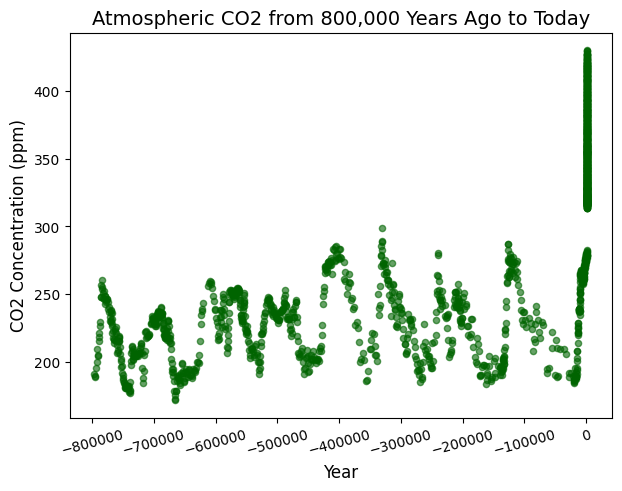

In [123]:
# Plot the full CO2 record
fig, ax = plt.subplots(figsize=(7,5))
data.plot.scatter(x='Date', y='CO2[ppm]', color='darkgreen', alpha=0.6, ax=ax)
ax.set_title("Atmospheric CO2 from 800,000 Years Ago to Today", fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Concentration (ppm)', fontsize=12)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10);

## Load and Explore In-built Dataset

We'll use the built-in Iris dataset, a classic dataset in data science, to demonstrate visualization techniques. Let's load the data and take a quick look at its structure.

In [124]:
# Load the Iris dataset from seaborn
iris = sns.load_dataset('iris')

# Display the first five rows
display(iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [125]:
# Basic information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [126]:
# Summary statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Basic Plotting with Matplotlib

Matplotlib is a versatile library for creating static, animated, and interactive visualizations in Python. Let's create some basic plots: line plot, bar chart, and scatter plot.

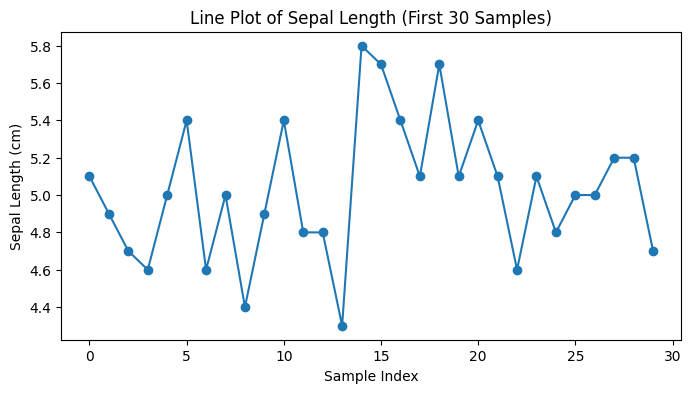

In [127]:
# Line plot: Sepal length of the first 30 samples
plt.figure(figsize=(8,4))
plt.plot(iris['sepal_length'][:30], marker='o')
plt.title('Line Plot of Sepal Length (First 30 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Sepal Length (cm)')
plt.show()

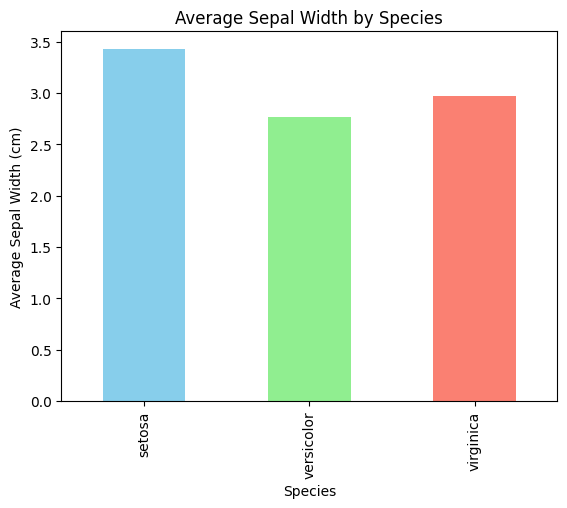

In [128]:
# Bar chart: Average sepal width by species
species_means = iris.groupby('species')['sepal_width'].mean()
species_means.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Width (cm)')
plt.show()

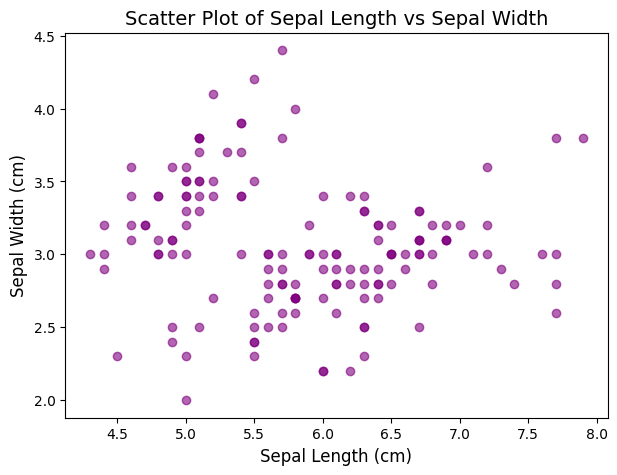

In [129]:
# Scatter plot: Sepal length vs Sepal width
plt.figure(figsize=(7,5))
plt.scatter(iris['sepal_length'], iris['sepal_width'], c='purple', alpha=0.6)
plt.title('Scatter Plot of Sepal Length vs Sepal Width', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12);

## 4. Data Visualization with Seaborn

Seaborn builds on matplotlib and provides a high-level interface for creating attractive and informative statistical graphics. Let's create some advanced plots: box plot, violin plot, and heatmap.

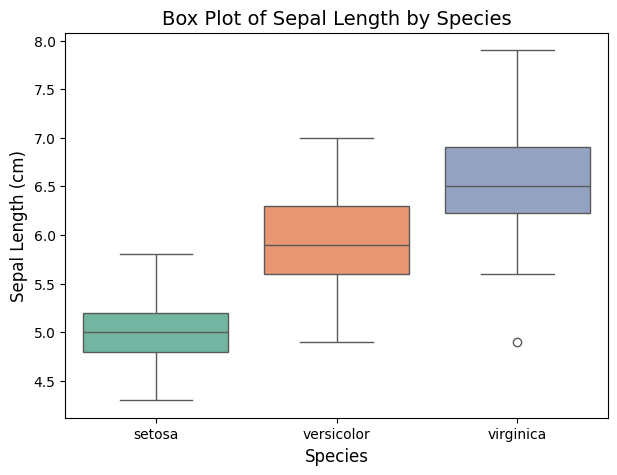

In [130]:
# Box plot: Sepal length by species
plt.figure(figsize=(7,5))
sns.boxplot(x='species', y='sepal_length', data=iris, palette='Set2', hue='species')
plt.title('Box Plot of Sepal Length by Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Sepal Length (cm)', fontsize=12);

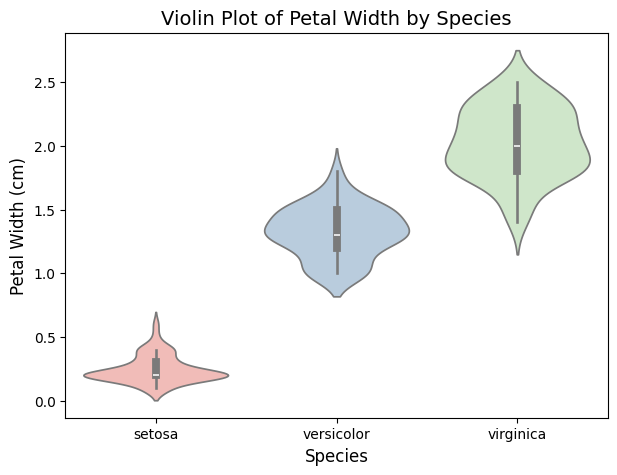

In [131]:
# Violin plot: Petal width by species
plt.figure(figsize=(7,5))
sns.violinplot(x='species', y='petal_width', data=iris, palette='Pastel1', hue='species')
plt.title('Violin Plot of Petal Width by Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12);

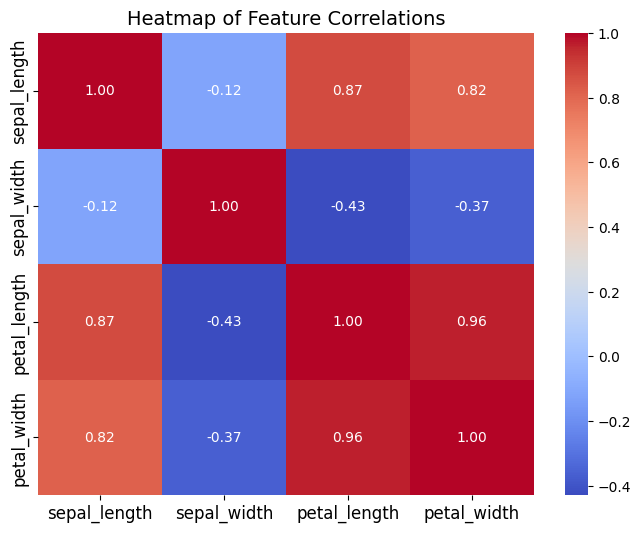

In [132]:
# Heatmap: Correlation matrix of the Iris dataset
plt.figure(figsize=(8,6))
corr = iris.drop('species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

## Customizing Plots (Titles, Labels, Legends)

Customizing your plots makes them more informative and visually appealing. You can add titles, axis labels, legends, and adjust colors and styles to improve readability.

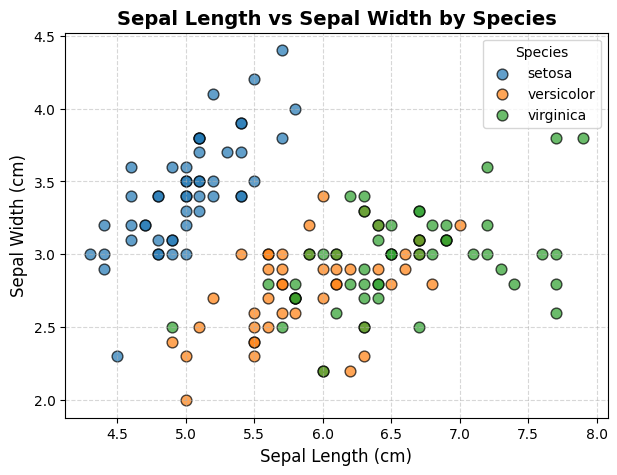

In [133]:
# Customizing a scatter plot with title, labels, and legend
plt.figure(figsize=(7,5))
for species, color in zip(iris['species'].unique(), ['red', 'green', 'blue']):
    subset = iris[iris['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species, alpha=0.7, s=60, edgecolor='k')
plt.title('Sepal Length vs Sepal Width by Species', fontsize=14, fontweight='bold')
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.legend(title='Species')
plt.grid(True, linestyle='--', alpha=0.5);

## Saving Visualizations to Files

You can save your plots as image files (e.g., PNG, JPG, PDF) using matplotlib's `savefig` function.

```Python
plt.savefig('filename.png')
```

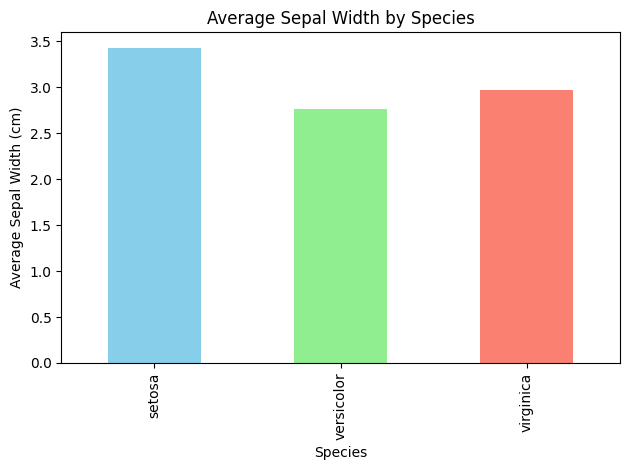

In [134]:
# Save a bar chart as a PNG file
species_means = iris.groupby('species')['sepal_width'].mean()
ax = species_means.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Width (cm)')
plt.tight_layout()
plt.savefig('average_sepal_width_by_species.png');  # Saves the figure to a file